## 3장. 주성분 분석(PCA)

라이브러리 불러오기

In [1]:
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [2]:
from glob import glob
import pandas as pd
from os.path import join
from tqdm.notebook import tqdm

데이터셋 불러오기

In [4]:
np_data = np.array([
    [170, 70],
    [150,45],
    [160,55],
    [170,60],
    [170,80]], dtype=np.float32)

df = pd.DataFrame(np_data, columns = ['height', 'weight'])
print(df)
df.head()

   height  weight
0   170.0    70.0
1   150.0    45.0
2   160.0    55.0
3   170.0    60.0
4   170.0    80.0


,height,weight
0,170.0,70.0
1,150.0,45.0
2,160.0,55.0
3,170.0,60.0
4,170.0,80.0


<AxesSubplot:xlabel='weight', ylabel='height'>

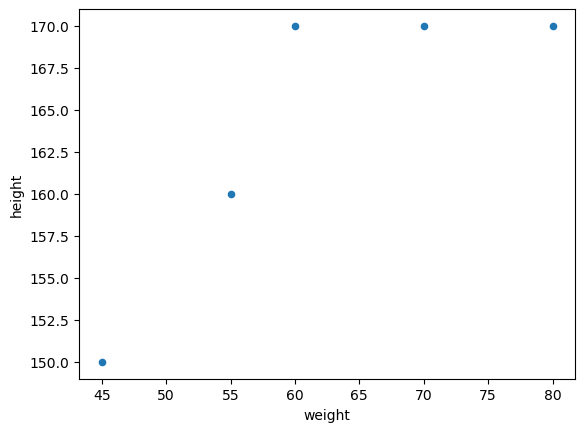

In [6]:
df.plot.scatter(x='weight', y='height')
# 산점도 그려씀 : x축은 weight, y축은 height


In [7]:
print(np_data.shape)
print(np_data.mean(axis=0)) #전체의 평균을 구해버리는 거...근데 우리는 그렇게하면 안되겠지?

(5, 2)
[164.  62.]


In [8]:
X = np_data - np_data.mean(axis=0)
print(X)

[[  6.   8.]
 [-14. -17.]
 [ -4.  -7.]
 [  6.  -2.]
 [  6.  18.]]


In [12]:
X.mean(axis=0)
X.shape # (5,2) => (2,5) * (5,2) => (2,2)

(5, 2)

In [13]:
#cov 메트릭스 만들기
cov = X.T @ X /len(X)
print(cov)

[[ 64.  82.]
 [ 82. 146.]]


In [14]:
#표준편차 구하기
np.sqrt(cov)

array([[ 8.      ,  9.055386],
       [ 9.055386, 12.083046]], dtype=float32)

In [15]:
#eigenvalue
#Ax = scalar_x
#(A-스칼리_I)x = 0
#det((A-스칼리_I) = 0
# = 스칼라^2 - (a+d)스칼리 +ad - bc = 0
# = 스칼라^2 - (a+d)스칼라 + det(A)
print(cov.diagonal().sum(), np.linalg.det(cov))
print(cov[0][0] + cov[1][1], cov[0][0]*cov[1][1] - cov[0][1]*cov[1][0])

210.0 2620.0
210.0 2620.0


In [16]:
#위의 식에 대해서 근의 공식 이용
#스칼라 = (-b + -sqrt(b^2-4ac))/2a
#e1 = (210.0 + np.sqrt(210.0^2 - 4*2620.0 ))
#e2 = (210.0 - np.sqrt(210.0^2 - 4*2620.0 ))

e1 = (cov.diagonal().sum() + np.sqrt(cov.diagonal().sum()**2 - 4*np.linalg.det(cov)))
e2 = (cov.diagonal().sum() - np.sqrt(cov.diagonal().sum()**2 - 4*np.linalg.det(cov)))

In [17]:
print(e1, e2)

393.3575741549828 26.642425845017243


In [18]:
print(e1/(e1+e2))
print(e2/(e1+e2))

0.9365656527499591
0.06343434725004106


### eigen vector 구하기

In [22]:
#(cov-260.0*I)x = 0 
cov_eig = cov - e1*np.eye(2)
print(np.eye(2))
print(cov_eig)

[[1. 0.]
 [0. 1.]]
[[-329.35757415   82.        ]
 [  82.         -247.35757415]]


In [23]:
#(A- 260.0)x = 0
# (ab) @ (x1 x2).T = 0
# a*x1 - b*x2
# x1 = -b, x2 =a
ev1 = np.array([-cov_eig[0][1], cov_eig[0][0]])
print(ev1)
print(cov_eig @ ev1)

[ -82.         -329.35757415]
[    0.         74745.09057255]


In [24]:
# 위에 숫자가 너무 크므로...크기를 1로 맞춰서 작성해준다.
ev1 / np.linalg.norm(ev1)

array([-0.24159439, -0.97037733])

In [20]:
#e2 구해주기

In [26]:
cov_eig = cov - e2*np.eye(2)
print(np.eye(2))
print(cov_eig)
ev2 = np.array([-cov_eig[0][1], cov_eig[0][0]])
print(ev2)
print(cov_eig @ ev2)

[[1. 0.]
 [0. 1.]]
[[ 37.35757415  82.        ]
 [ 82.         119.35757415]]
[-82.          37.35757415]
[    0.         -2265.09057255]


In [27]:
print(e1, ev1, ev1 / np.linalg.norm(ev1))
print(e2, ev2 , ev2 / np.linalg.norm(ev2))

393.3575741549828 [-82.          37.35757415] [-0.91001143  0.41458316]
26.642425845017243 [-82.          37.35757415] [-0.91001143  0.41458316]


In [28]:
np.linalg.norm(ev1) # 방향은 일치 시키고 크기를 줄여주자

90.10875843526553

In [29]:
ev1 / np.linalg.norm(ev1)

array([-0.91001143,  0.41458316])

In [30]:
e_value, e_vector = np.linalg.eig(cov)

In [31]:
e_value

array([ 13.321213, 196.67879 ], dtype=float32)

In [32]:
e_vector.T

array([[-0.8506508,  0.5257311],
       [-0.5257311, -0.8506508]], dtype=float32)

In [33]:
(ev1 / np.linalg.norm(ev1)) @ e_vector[0].T #(ev2)

0.5561426810786487

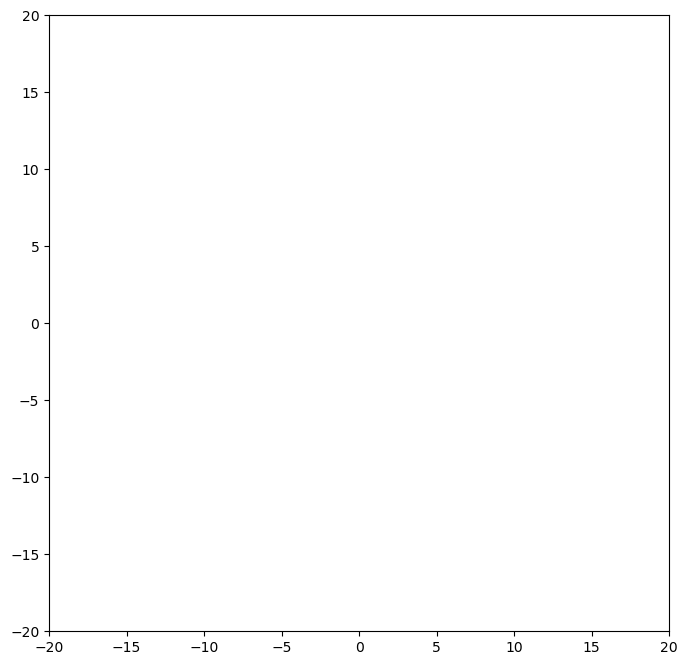

In [35]:
plt.figure(figsize=(8,8))
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.show()

KeyError: 'height'

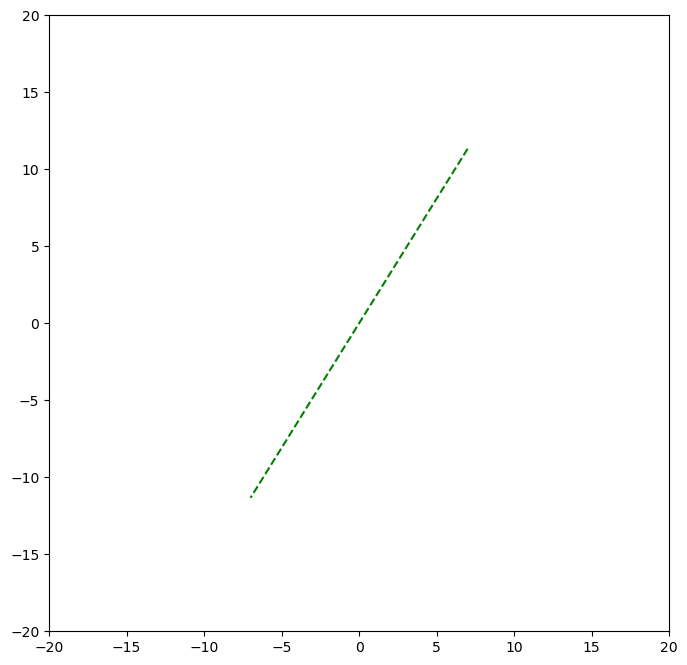

In [50]:
plt.figure(figsize=(8,8))
plt.xlim((-20, 20))
plt.ylim((-20, 20))

x = [-(e_value[0]*e_vector[0])[1], (e_value[0]*e_vector[0])[1]] #ev1 기울기
y = [-(e_value[0]*e_vector[0])[0], (e_value[0]*e_vector[0])[0]]
plt.plot(x, y, 'g--')

x = [-(e_value[1]*e_vector[1])[1], (e_value[1]*e_vector[1])[1]] #ev2 기울기
y = [-(e_value[1]*e_vector[1])[1], (e_value[1]*e_vector[1])[0]]
plt.plot(x, y, 'r--')

plt.scatter(df['weight'], df['height'])

In [37]:
ev1_norm = ev1/np.linalg.norm(ev1)
ev1_norm += -1
ev1_norm

array([-1.91001143, -0.58541684])

In [38]:
print(np_data)


[[170.  70.]
 [150.  45.]
 [160.  55.]
 [170.  60.]
 [170.  80.]]


In [39]:
print(X)

[[  6.   8.]
 [-14. -17.]
 [ -4.  -7.]
 [  6.  -2.]
 [  6.  18.]]


In [40]:
print(X @ ev1_norm.T) #new X

[-16.14340326  36.69224622  11.73796357 -10.2892349  -21.99757162]


In [41]:
print(X @ (ev2 / np.linalg.norm(ev2))) #new y

[-2.14340326  5.69224622  0.73796357 -6.2892349   2.00242838]


Iris 데이터셋 차원 축소하기(4차원 -> 3차원)

### Standard 스켈러이용해볼까 

In [42]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
print(len(df), df.target.drop_duplicates().tolist())
df.head()

150 ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = df.drop(['target'], axis=1).values # 독립변인들의 value값만 추출
y = df['target'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
df_feature = pd.DataFrame(x, columns=features)
df_feature = pd.concat([df_feature, pd.Series(y, name='target')], axis=1)
df_feature.head()

,sepal length,sepal width,petal length,petal width,target
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


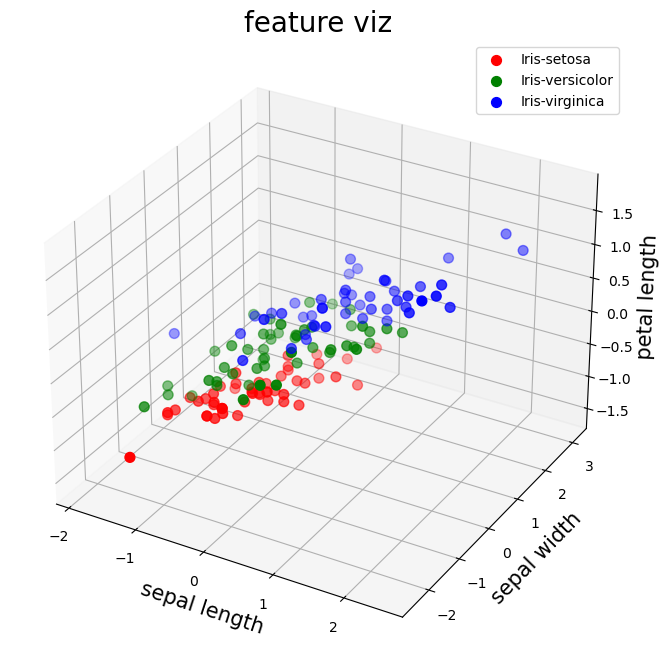

In [44]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('sepal length', fontsize = 15)
ax.set_ylabel('sepal width', fontsize = 15)
ax.set_zlabel('petal length', fontsize = 15)
ax.set_title('feature viz', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_feature['target'] == target
    ax.scatter(df_feature.loc[indicesToKeep, 'sepal length'],
               df_feature.loc[indicesToKeep, 'sepal width'],
               df_feature.loc[indicesToKeep, 'petal length'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()

In [45]:
from sklearn.decomposition import PCA
n_comp = 4
pca = PCA(n_components=n_comp) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = [f'pc{i}' for i in range(1, n_comp+1)])
finalDf = pd.concat([principalDf, pd.Series(y, name='target')], axis=1)
# 주성분으로 이루어진 데이터 프레임 구성

In [46]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.72770452 0.23030523 0.03683832 0.00515193]
1.0000000000000002


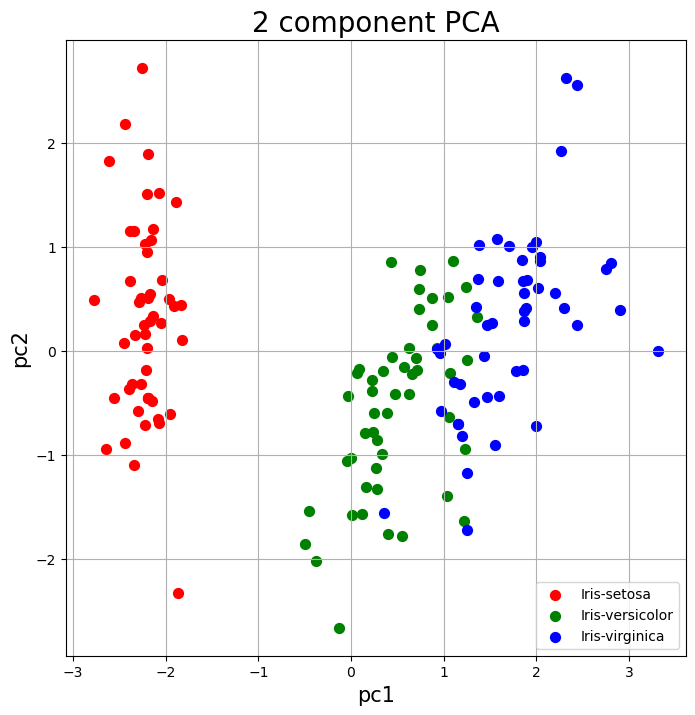

In [47]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()